# Machine Learning Final Exam, Aug Semester, 2020

In this exam, you will demonstrate your understanding of the material from the lectures and labs.

For each question, insert your answer directly in this sheet. When complete, export the sheet as a PDF and upload to Gradescope.
Note that you have **2.5 hours** to do the exam. Also note that there are some short answer questions that you may be able to answer faster than the coding questions. You might consider answering those questions first to get as much credit as possible!

## Question 1 (10 points)

Download the [CSV dataset](http://www.cs.ait.ac.th/~mdailey/class/ml/final-exam-data.csv) for the exam.
Note that the data are two dimensional with labels '0' and '1'. Provide a scatter plot for the data with
the two classes shown in different colors.

In [1]:
# Place code to load the data and plot the scatterplot here

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook as tqdm
import time

In [3]:
df = pd.read_csv('final-exam-data.csv')

df_X = df[['# x1','x2']]
df_y = df[['y']]

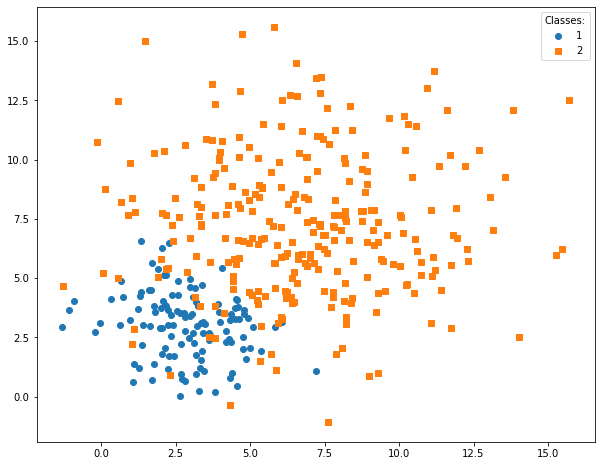

In [4]:
ind_1 = np.where(df_y==0)[0]
ind_2 = np.where(df_y==1)[0]

plt.figure(figsize=(10,8))
cl1 = plt.scatter(df_X.iloc[ind_1,0],df_X.iloc[ind_1,1],marker='o',)
cl2 = plt.scatter(df_X.iloc[ind_2,0],df_X.iloc[ind_2,1],marker='s')
plt.legend((cl1,cl2),('1','2'),title='Classes:',fontsize=10)
plt.show()

## Question 2 (30 points)

Do the following:
1. Split the dataset from Question 1 into a training set (80%) and validation set (20%).
2. Using the logistic regression code we developed in lab, fit a logistic regression model to the data in the training set.
3. Indicate the training set accuracy and validation set accuracy of the logistic regression model.
4. Make two separate plots, one for the training set and one for the validation set, with three colors: one for correctly classified points from class 1, one for correctly classified points from class 2, and one for incorrectly classified points.

In [5]:
X1 = df_X.to_numpy()
y1 = df_y.to_numpy()

In [6]:
# Place code to split the data, fit the LR model, output accuracy, and plot the result here

X = np.concatenate((np.ones((X1.shape[0],1)),X1),1)
y = y1

# Split the data
def train_val_split(X,y,train_size):
    m = X.shape[0]
    order = np.arange(m)
    np.random.shuffle(order)
    train_len = int(m*train_size)
    train_in = order[:train_len]
    val_in = order[train_len:]
    X_train = X[train_in,:]
    y_train = y[train_in,:]
    X_val = X[val_in,:]
    y_val = y[val_in,:]
    return X_train,y_train,X_val,y_val
X_train,y_train,X_val,y_val = train_val_split(X,y,0.8)

In [7]:
# Logistic regression model

def sigmoid(z):
    return 1.0/(1 + np.exp(z))

def crossentropy(X,y,theta,alpha):
    yhat = sigmoid(-X @ theta)
    cost = - (y * np.log(yhat) + (1- y ) * np.log(1-yhat)).mean()
    grad_cost = X.T @ (yhat - y)
    return cost, grad_cost

def logistic_fit(X,y,epochs,alpha):
    theta = np.zeros((3,1))
    costs = []
    for epoch in tqdm(range(epochs),desc='Progress bar'):
        cost,grad_cost = crossentropy(X,y,theta,alpha)
        costs.append(cost)
        theta = theta - alpha*grad_cost
    return costs, theta

def predict(X,theta):
    yhat = sigmoid(-X @ theta)
    preds = np.where(yhat>=0.5,1,0)
    return preds

def accuracy(X,y,theta):
    yhat = sigmoid(-X @ theta)
    preds = np.where(yhat>=0.5,1,0)
    acc = (preds == y).sum()/y.shape[0]
    return acc*100

Progress bar:   0%|          | 0/1000 [00:00<?, ?it/s]

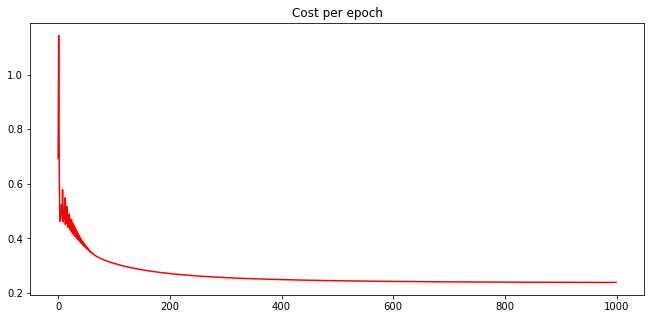

In [8]:
# fit the LR model
costs, theta = logistic_fit(X_train,y_train,epochs=1000,alpha=0.001)
plt.figure(figsize=(11,5))
plt.plot(np.arange(1000),costs,'r-')
plt.title('Cost per epoch')
plt.show()

In [9]:
# Output accuracy
train_acc = accuracy(X_train,y_train,theta)
val_acc = accuracy(X_val,y_val,theta)
print('Training set accuracy',train_acc,'%')
print('Validation set accuracy',val_acc,'%')

Training set accuracy 90.0 %
Validation set accuracy 90.0 %


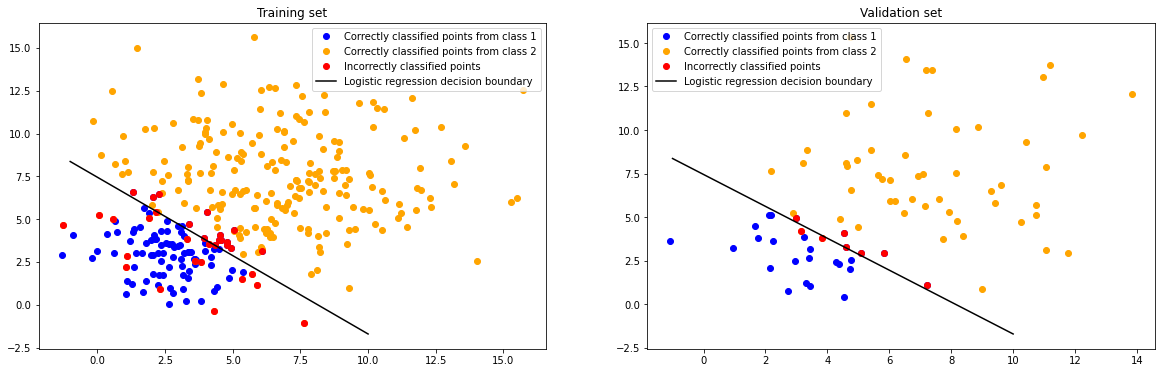

In [10]:
# Plot the result
matplotlib.rcParams['figure.figsize'] = [20,6]
fig,(ax1,ax2) = plt.subplots(1,2)

# Training set
ax1.set_title('Training set')
preds = predict(X_train,theta)
ax1.plot(X_train[y_train.reshape(-1)==0,1],X_train[y_train.reshape(-1)==0,2],'bo',label='Correctly classified points from class 1')
ax1.plot(X_train[y_train.reshape(-1)==1,1],X_train[y_train.reshape(-1)==1,2],'o', color='orange',label='Correctly classified points from class 2')
ax1.plot(X_train[preds.reshape(-1) != y_train.reshape(-1),1],X_train[preds.reshape(-1) != y_train.reshape(-1),2],'ro',label='Incorrectly classified points')
x11 = -1
x12 = 10
x21 = (- theta[1,0] * x11 - theta[0,0]) / theta[2,0]
x22 = (- theta[1,0] * x12 - theta[0,0]) / theta[2,0]
ax1.plot((x11, x12),(x21, x22),'k-',label='Logistic regression decision boundary')
ax1.legend()

# Training set
ax2.set_title('Validation set')
preds = predict(X_val,theta)
ax2.plot(X_val[y_val.reshape(-1)==0,1],X_val[y_val.reshape(-1)==0,2],'bo',label='Correctly classified points from class 1')
ax2.plot(X_val[y_val.reshape(-1)==1,1],X_val[y_val.reshape(-1)==1,2],'o', color='orange',label='Correctly classified points from class 2')
ax2.plot(X_val[preds.reshape(-1) != y_val.reshape(-1),1],X_val[preds.reshape(-1) != y_val.reshape(-1),2],'ro',label='Incorrectly classified points')
x11 = -1
x12 = 10
x21 = (- theta[1,0] * x11 - theta[0,0]) / theta[2,0]
x22 = (- theta[1,0] * x12 - theta[0,0]) / theta[2,0]
ax2.plot((x11, x12),(x21, x22),'k-',label='Logistic regression decision boundary')
ax2.legend()

plt.show()

## Question 3 (20 points)

Repeat Question 2 using the PyTorch neural network library. Your PyTorch model should have a single linear layer with two inputs and a single output, a logistic sigmoid activation function, binary cross entropy loss function, and stochastic gradient descent for the optimizer. Show the same plots you showed for Question 2.

In [11]:
# Place code to build, train, and evaluate your PyTorch model here
import torch
import torchvision

In [12]:
# Split the data
def train_val_split(X,y,train_size):
    m = X.shape[0]
    order = np.arange(m)
    np.random.shuffle(order)
    train_len = int(m*train_size)
    train_in = order[:train_len]
    val_in = order[train_len:]
    X_train = X[train_in,:]
    y_train = y[train_in,:]
    X_val = X[val_in,:]
    y_val = y[val_in,:]
    return X_train,y_train,X_val,y_val
X_train,y_train,X_val,y_val = train_val_split(X1,y1,0.8)

In [74]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
class dataset():
    def __init__(self,X,y,transform=None):
        self.inputs = X
        self.labels = y
        self.transform = transform
    
    def __len__(self):
        return len(self.inputs)
    
    def __getitem__(self,index):
        inputs = self.transform(self.inputs)
        labels = self.transform(self.labels)
        return inputs.float(), labels.float()  

In [75]:
train_data = dataset(X_train,y_train,transform)
val_data = dataset(X_val,y_val,transform)

In [76]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_data,batch_size =batch_size,shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data,batch_size =batch_size,shuffle=False)

In [81]:
class NN_model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = torch.nn.Linear(2,1)
        self.act = torch.nn.Sigmoid()
    
    def forward(self,x):
        x = self.fc(x)
        return self.act(x)

net = NN_model()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(net.parameters(),lr=0.001,momentum=0.9)
if torch.cuda.is_available:
    net = net.cuda()

In [82]:
epochs = 1000

train_acc = []
val_acc = []
for epoch in tqdm(range(epochs),desc='Progress bar'):
    # Training set
    net.train()
    correct = 0
    for i,(input,target) in enumerate(train_loader):
        if torch.cuda.is_available():
            input = input.cuda()
            target = target.cuda()
        optimizer.zero_grad()
        # Forward pass
        output = net(input)
        loss = criterion(output, target)
        # Backward
        loss.backward()
        # Update weight
        optimizer.step()
        # Record training accuracy
        predicted = torch.where(output.data>=0.5,1,0)
        correct = (predicted[0] == target[0]).sum()
    
    train_acc.append(100*correct/len(train_loader.dataset))
    
    # Validation set
    net.eval()
    correct = 0
    for i,(input,target) in enumerate(val_loader):
        if torch.cuda.is_available():
            input = input.cuda()
            target = target.cuda()
        optimizer.zero_grad() 
        # Forward pass
        output = net(input)
        loss = criterion(output, target)
        # Record validation accuracy
        predicted = torch.where(output.data>=0.5,1,0)
        correct = (predicted[0] == target[0]).sum()
    
    val_acc.append(100*correct/len(val_loader.dataset))

Progress bar:   0%|          | 0/1000 [00:00<?, ?it/s]

In [83]:
print('Training set accuracy',train_acc[-1].item())
print('Validation set accuracy',val_acc[-1].item())

Training set accuracy 88.4375
Validation set accuracy 90.0


In [94]:
# Predict function
def predict(x):
    x = transform(x).cuda().float()
    output = net(x)
    preds = torch.where(output.data>=0.5,1,0)
    return preds.cpu().numpy().reshape(-1,1)

def accracy(x,y):
    x = transform(x).cuda().float()
    output = net(x)
    preds = torch.where(output.data>=0.5,1,0)
    preds = preds.cpu().numpy().reshape(-1,1)
    acc = (preds.reshape(-1) == y.reshape(-1)).sum()/len(y)
    return acc*100

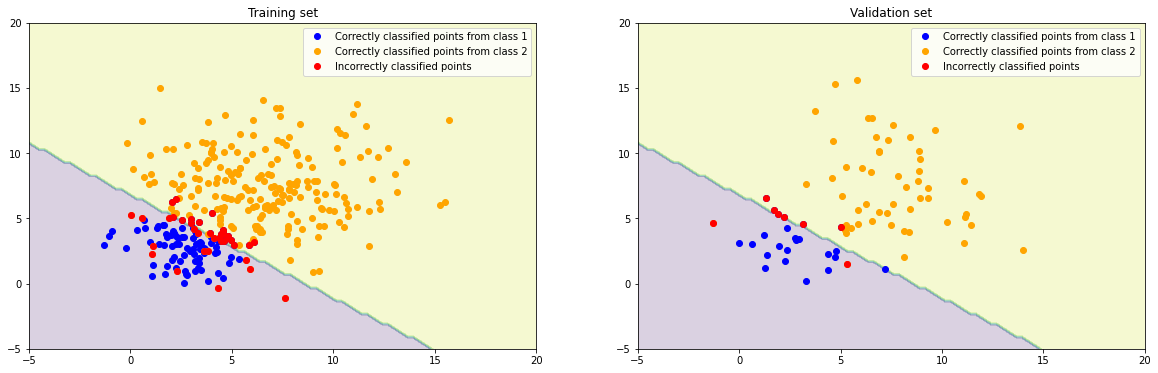

In [85]:
# Plot the result
matplotlib.rcParams['figure.figsize'] = [20,6]
fig,(ax1,ax2) = plt.subplots(1,2)

# Training set
ax1.set_title('Training set')

grid_x,grid_y = np.mgrid[-5:20:100j,-5:20:100j]
grid_xy = np.vstack([grid_x.ravel(),grid_y.ravel()]).T
z = predict(grid_xy).reshape((100,100))
ax1.contourf(grid_x , grid_y, z, alpha = 0.2)

preds = predict(X_train)
ax1.plot(X_train[y_train.reshape(-1)==0,0],X_train[y_train.reshape(-1)==0,1],'bo',label='Correctly classified points from class 1')
ax1.plot(X_train[y_train.reshape(-1)==1,0],X_train[y_train.reshape(-1)==1,1],'o', color='orange',label='Correctly classified points from class 2')
ax1.plot(X_train[preds.reshape(-1) != y_train.reshape(-1),0],X_train[preds.reshape(-1) != y_train.reshape(-1),1],'ro',label='Incorrectly classified points')

ax1.legend()


# Training set
ax2.set_title('Validation set')

grid_x,grid_y = np.mgrid[-5:20:100j,-5:20:100j]
grid_xy = np.vstack([grid_x.ravel(),grid_y.ravel()]).T
z = predict(grid_xy).reshape((100,100))
ax2.contourf(grid_x , grid_y, z, alpha = 0.2)

preds = predict(X_val)
ax2.plot(X_val[y_val.reshape(-1)==0,0],X_val[y_val.reshape(-1)==0,1],'bo',label='Correctly classified points from class 1')
ax2.plot(X_val[y_val.reshape(-1)==1,0],X_val[y_val.reshape(-1)==1,1],'o', color='orange',label='Correctly classified points from class 2')
ax2.plot(X_val[preds.reshape(-1) != y_val.reshape(-1),0],X_val[preds.reshape(-1) != y_val.reshape(-1),1],'ro',label='Incorrectly classified points')

ax2.legend()

plt.show()

## Question 4 (20 points)

Add a 10-unit hidden layer with ReLU activation to the PyTorch model from Question 3. Plot training loss and validation loss as function of epoch of training. Do you see any evidence of overfitting?

In [98]:
# Place code to build, train, and evaluate your PyTorch model here
class NN_model1(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(2,10)
        self.act1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(10,1)
        self.act2 = torch.nn.Sigmoid()
        
    
    def forward(self,x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return self.act2(x)

net1 = NN_model1()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(net.parameters(),lr=0.001,momentum=0.9)
if torch.cuda.is_available:
    net1 = net1.cuda()

In [100]:
epochs = 1000

train_loss = []
val_loss = []
for epoch in tqdm(range(epochs),desc='Progress bar'):
    # Training set
    net1.train()
    epoch_loss = 0
    iters = 0
    for i,(input,target) in enumerate(train_loader):
        if torch.cuda.is_available():
            input = input.cuda()
            target = target.cuda()
        optimizer.zero_grad()
        # Forward pass
        output = net1(input)
        loss = criterion(output, target)
        # Backward
        loss.backward()
        # Update weight
        optimizer.step()
        # Record training loss
        epoch_loss += loss.item()
        iters += 1
    
    train_loss.append(epoch_loss/iters)
    
    # Validation set
    net1.eval()
    epoch_loss = 0
    iters = 0
    for i,(input,target) in enumerate(val_loader):
        if torch.cuda.is_available():
            input = input.cuda()
            target = target.cuda()
        optimizer.zero_grad() 
        # Forward pass
        output = net1(input)
        loss = criterion(output, target)
        # Record validation loss
        epoch_loss += loss.item()
        iters += 1
    
    val_loss.append(epoch_loss/iters)
    
    if epoch%100==0:
        print('Epoch %d/%d, Train loss %.4f, Val loss %.4f' %(epoch+1,epochs,train_loss[-1],val_loss[-1]))
    

Progress bar:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1/1000, Train loss 0.8943, Val loss 0.8791
Epoch 101/1000, Train loss 0.8943, Val loss 0.8791
Epoch 201/1000, Train loss 0.8943, Val loss 0.8791
Epoch 301/1000, Train loss 0.8943, Val loss 0.8791
Epoch 401/1000, Train loss 0.8943, Val loss 0.8791
Epoch 501/1000, Train loss 0.8943, Val loss 0.8791
Epoch 601/1000, Train loss 0.8943, Val loss 0.8791
Epoch 701/1000, Train loss 0.8943, Val loss 0.8791
Epoch 801/1000, Train loss 0.8943, Val loss 0.8791
Epoch 901/1000, Train loss 0.8943, Val loss 0.8791


In [96]:
print('Training accuracy',accracy(X_train,y_train))
print('Validation accuracy',accracy(X_val,y_val))

Training accuracy 93.4375
Validation accuracy 92.5


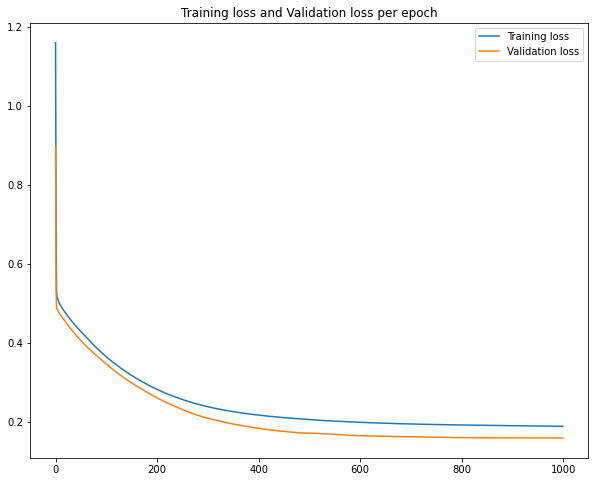

In [90]:
fig = plt.figure(figsize=(10,8))
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training loss and Validation loss per epoch')
plt.legend()
plt.show()

*Discuss whether you observe overfitting here.*

In this case, the validation loss lower than then training loss, it was because of the validation set is too small. Otherwise, we got the traning accuracy is greater than validation accuracy the model is clearly overfitting.


**There are four categories of fit:**

- **Underfit** - Validation and training accuracy low **OR** Both training and validation cost is high --> Increase complexity.
- **Overfit** - Validation accuracy low, training accuracy high **OR** Training error is decreasing but validation error is increasing, we are overfitting the training data --> Decrease complexity.
- **Good fit** - Validation accuracy and training accuracy high with the former slightly lower than the latter
- **Bad/Incorrect/Unknown fit** - Validation accuracy higher than training accuracy

## Question 5 (10 points)

In fact, the data from Question 1 were generated from a Gaussian mixture model. If you were given the data without the labels, for unsupervised learning, do you think the EM algorithm for Gaussian mixtures with $k=2$ components would recover the two classes? Why or why not?

*Discuss here.*

## Question 6 (10 points)

Consider the following problem: Students taking classes in Room TC 103 often feel the room is too cold or too hot. To solve the problem, we connect three air conditioners' on/off switches to a computer, place a temperature sensor outdoors next to the room, and put a button box on each student's desk with 3 buttons, labeled "I'm freezing," "I'm sweating", and "I feel good." Students can press any of the three buttons to indicate their comfort level. Every 10 minutes, the outdoor temperature is measured in degrees Celsius, and the current comfort level of each student (1, 2, or 3) is measured. The system gets the measurements as input and then has to set the control for each of the three air conditioners to high, low, or off for the next 10 minutes.

Suppose you would like to build a reinforcement learning agent to optmize the air conditioning control for the room. Do the following:

1. Briefly explain the state space, action space, reward function, and discount factor you think should be used for this problem.
2. Briefly explain the reason it is difficult to know the transition probabilities for this problem.
3. Briefly describe how you could use a neural network to learn the state transition probabilities.

*Write your explanations here.*